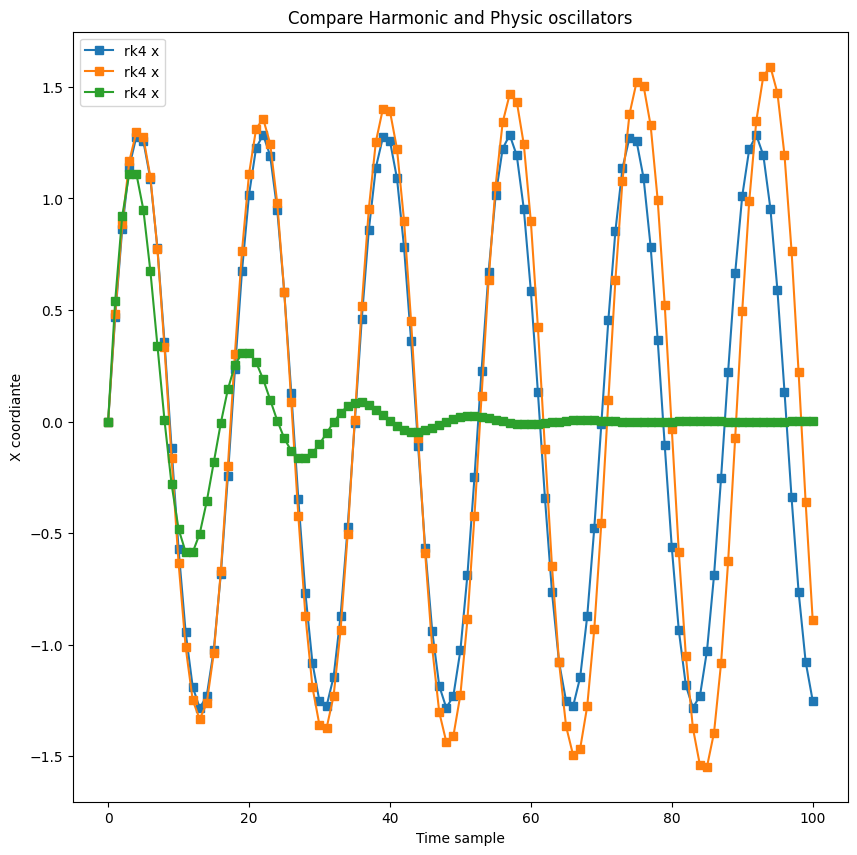

In [20]:
from PlotContextManager import *

import matplotlib.pyplot as plt

def prepare_harmonic_and_physic():

    fig = plt.figure(figsize = (10, 10))
    ax = plt.gca()
    ax.set_title('Compare Harmonic and Physic oscillators')
    ax.set_xlabel('Time sample')
    ax.set_ylabel('X coordiante')
    
    return fig, ax

with open('configs/physic_config.json') as file:

        config_dict = json.load(file)

        w = config_dict["w"]

with PlotContextManager(prepare_harmonic_and_physic, "harmonic vs physic") as ax:
    
        run_config('./solver.exe', ConfigInfo('physic_oscillator', 'configs/physic_config.json'))
            
        method = MethodData('rk4', 'physic.bin', 's', w)

        method.plot_x(ax)
    
        run_config('./solver.exe', ConfigInfo('harmonic_oscillator', 'configs/harmonic_config.json'))
            
        method = MethodData('rk4', 'harmonic.bin', 's', w)

        method.plot_x(ax)

        run_config('./solver.exe', ConfigInfo('damped_oscillator', 'configs/damped_config.json'))
            
        method = MethodData('rk4', 'damped.bin', 's', w)

        method.plot_x(ax)